<a href="https://colab.research.google.com/github/VanishingRasengan/WahlfachKISoSe23/blob/main/Machine_Learning_with_Tree_Based_Models_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification and Regression Trees
Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

## Train your first classification tree
In this exercise you'll work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os, scipy, sklearn
import sklearn.metrics, sklearn.preprocessing, sklearn.model_selection, sklearn.tree, sklearn.linear_model, sklearn.cluster
!pip install mlxtend --upgrade --no-deps

# importing the pathlib module - a handy library for working with the local file system in an object oriented way
from pathlib import Path
import pandas as pd

# creating a path object of our data directory within the mounted Google Drive
wbc_path = Path('/content/')

### to download the .csv file
!pip install wget
import wget
wget.download('https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv')

# create another pathlib object with the path to the csv file
wbc_csv_path = wbc_path / 'wbc.csv'
wbc_df = pd.read_csv(wbc_csv_path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=f5fd72f19905c28eb8fab072b60823c4d8efa90ecc1a1d2d3f550bdfc9f7713f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
wbc_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
X = wbc_df[['radius_mean', 'concave points_mean']]
y = wbc_df['diagnosis']
y = y.map({'M':1, 'B':0})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

The dataset is now loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

- Import DecisionTreeClassifier from sklearn.tree.
- Instantiate a DecisionTreeClassifier dt of maximum depth equal to 6.
- Fit dt to the training set.
- Predict the test set labels and assign the result to y_pred.

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 0]


## Evaluate the classification tree
Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test and the array of labels y_test.

- Import the function accuracy_score from sklearn.metrics.
- Predict the test set labels and assign the obtained array to y_pred.
- Evaluate the test set accuracy score of dt by calling accuracy_score() and assign the value to acc.

In [ ]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


## Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

I have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers.

X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise , as well as the function plot_labeled_decision_regions() are available in your workspace.

- Import LogisticRegression from sklearn.linear_model.
- Instantiate a LogisticRegression model and assign it to logreg.
- Fit logreg to the training set.
- Review the plot generated by plot_labeled_decision_regions().

In [ ]:
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained
    in the 2D dataset (X,y) along with the decision
    regions of two trained classification models contained in the
    list 'models'.

    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers

    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


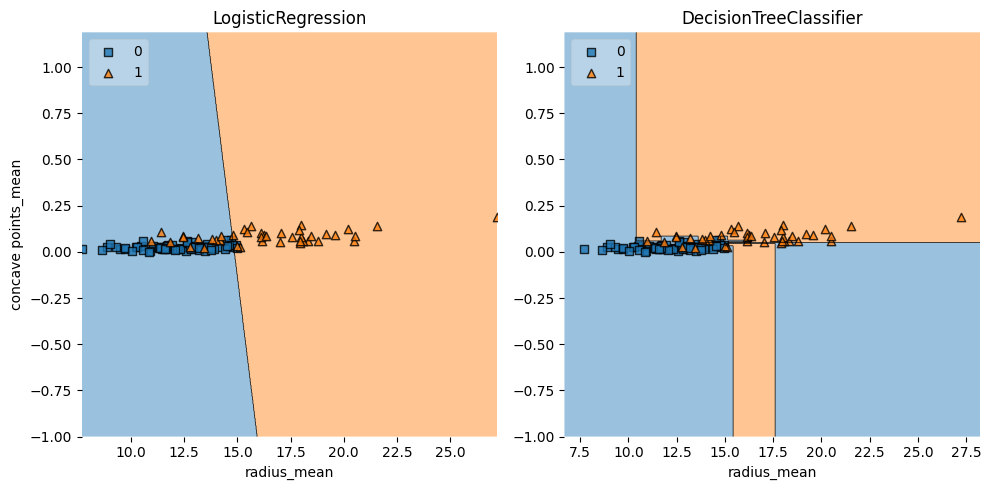

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, clfs)

# Classification tree Learning

## Using entropy as a criterion

In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

X_train as well as the array of labels y_train are available in your workspace.

- Import DecisionTreeClassifier from sklearn.tree.
- Instantiate a DecisionTreeClassifier dt_entropy with a maximum depth of 8.
- Set the information criterion to 'entropy'.
- Fit dt_entropy on the training set.

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [ ]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

## Entropy vs Gini index
In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

X_test, y_test, dt_entropy, as well as accuracy_gini which corresponds to the test set accuracy achieved by dt_gini are available in your workspace.

- Import accuracy_score from sklearn.metrics.
- Predict the test set labels of dt_entropy and assign the result to y_pred.
- Evaluate the test set accuracy of dt_entropy and assign the result to accuracy_entropy.
- Review accuracy_entropy and accuracy_gini.

In [ ]:
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

# Print accuracy_gini
print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  0.8947368421052632
Accuracy achieved by using gini:  0.8859649122807017


# Decision-Tree for Regression

## Train your first regression tree
In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

Here, we first process the dataset for you and is split to 80% train and 20% test.

In [ ]:
# importing the pathlib module - a handy library for working with the local file system in an object oriented way
from pathlib import Path
import pandas as pd

# creating a path object of our data directory within the mounted Google Drive
mpg_path = Path('/content/')

import wget
wget.download('https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv')

# create another pathlib object with the path to the csv file
mpg_path = mpg_path / 'auto.csv'
mpg = pd.read_csv(mpg_path)

In [ ]:
mpg.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [ ]:
mpg = pd.get_dummies(mpg)

In [ ]:
mpg.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [ ]:
X = mpg.drop('mpg', axis='columns')
y = mpg['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

The features matrix X_train and the array y_train are now available in your workspace.


- Import DecisionTreeRegressor from sklearn.tree.
- Instantiate a DecisionTreeRegressor dt with maximum depth 8 and min_samples_leaf set to 0.13.
- Fit dt to the training set.


In [ ]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

## Evaluate the regression tree
In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix X_test, the array y_test, as well as the decision tree regressor dt that you trained in the previous exercise are available in your workspace.


- Import the function mean_squared_error as MSE from sklearn.metrics.
- Predict the test set labels and assign the output to y_pred.
- Compute the test set MSE by calling MSE and assign the result to mse_dt.
- Compute the test set RMSE and assign it to rmse_dt.


In [ ]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.37


## Linear regression vs regression tree
In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

- Predict test set labels using the linear regression model (lr) and assign the result to y_pred_lr.
- Compute the test set MSE and assign the result to mse_lr.
- Compute the test set RMSE and assign the result to rmse_lr.


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

# Compute mse_lr
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** 0.5

# Print rmse_lr
print("Linear Regression test set RMSE: {:.2f}".format(rmse_lr))

# Print rmse_dt
print("Regression Tree test set RMSE: {:.2f}".format(rmse_dt))

Linear Regression test set RMSE: 5.10
Regression Tree test set RMSE: 4.37


## Instantiate the model

In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

We have already processed the data and loaded the features matrix X and the array y in your workspace. In addition, the DecisionTreeRegressor class was imported from sklearn.tree.

- Import train_test_split from sklearn.model_selection.
- Split the data into 70% train and 30% test.
- Instantiate a DecisionTreeRegressor with max depth 4 and min_samples_leaf set to 0.26.


In [ ]:
mpg.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [ ]:
X = mpg.drop('mpg', axis='columns')
y = mpg['mpg']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

## Evaluate the 10-fold CV error
In this exercise, you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree dt that you instantiated in the previous exercise.

In addition to dt, the training data including X_train and y_train are available in your workspace. We also imported cross_val_score from sklearn.model_selection.

Note that since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

- Compute dt's 10-fold cross-validated MSE by setting the scoring argument to 'neg_mean_squared_error'.
- Compute RMSE from the obtained MSE scores.



In [ ]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10,
                                 scoring='neg_mean_squared_error', n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean()) ** 0.5

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


## Evaluate the training error
You'll now evaluate the training set RMSE achieved by the regression tree dt that you instantiated in a previous exercise.

In addition to dt, X_train and y_train are available in your workspace.

Note that in scikit-learn, the MSE of a model can be computed as follows:

MSE_model = mean_squared_error(y_true, y_predicted)

where we use the function mean_squared_error from the metrics module and pass it the true labels y_true as a first argument, and the predicted labels from the model y_predicted as a second argument.

- Import mean_squared_error as MSE from sklearn.metrics.
- Fit dt to the training set.
- Predict dt's training set labels and assign the result to y_pred_train.
- Evaluate dt's training set RMSE and assign it to RMSE_train.


In [ ]:
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train)) ** 0.5

# Print RMSE_train
print("Train RMSE: {:.2f}".format(RMSE_train))

Train RMSE: 5.15


## Define the ensemble

In the following set of exercises, you'll work with the Indian Liver Patient Dataset from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

The classes LogisticRegression, DecisionTreeClassifier, and KNeighborsClassifier under the alias KNN are available in your workspace.

- Instantiate a Logistic Regression classifier and assign it to lr.
- Instantiate a KNN classifier that considers 27 nearest neighbors and assign it to knn.
- Instantiate a Decision Tree Classifier with the parameter min_samples_leaf set to 0.13 and assign it to dt.


In [ ]:
url = 'https://raw.githubusercontent.com/VanishingRasengan/WahlfachKISoSe23/main/datasets/indian_liver_patient_preprocessed.csv'
indian = pd.read_csv(url)

In [ ]:
indian.head()

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [ ]:
X = indian.drop(['Liver_disease', 'Unnamed: 0'], axis='columns')
y = indian['Liver_disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

# Set seed for reproducibility
SEED = 1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [
    ('Logistic Regression', lr),
    ('K Nearest Neighbors', knn),
    ('Classification Tree', dt)
]

## Evaluate individual classifiers
In this exercise you'll evaluate the performance of the models in the list classifiers that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

The dataset is already loaded and preprocessed for you (numerical features are standardized) and it is split into 70% train and 30% test. The features matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have loaded the list classifiers from the previous exercise, as well as the function accuracy_score() from sklearn.metrics.

- Iterate over the tuples in classifiers. Use clf_name and clf as the for loop variables:
- Fit clf to the training set.
- Predict clf's test set labels and assign the results to y_pred.
- Evaluate the test set accuracy of clf and print the result.

In [ ]:
from sklearn.metrics import accuracy_score

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.759
K Nearest Neighbors : 0.701
Classification Tree : 0.730


## Better performance with a Voting Classifier
Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

X_train, X_test,y_train, y_test, the list classifiers defined in a previous exercise, as well as the function accuracy_score from sklearn.metrics are available in your workspace.

- Import VotingClassifier from sklearn.ensemble.
- Instantiate a VotingClassifier by setting the parameter estimators to classifiers and assign it to vc.
- Fit vc to the training set.
- Evaluate vc's test set accuracy using the test set predictions y_pred.


In [ ]:
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)

# Fit vs to the training set
vc.fit(X_train, y_train)

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.770


## Define the bagging classifier

In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

- Import DecisionTreeClassifier from sklearn.tree and BaggingClassifier from sklearn.ensemble.
- Instantiate a DecisionTreeClassifier called dt.
- Instantiate a BaggingClassifier called bc consisting of 50 trees.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

## Evaluate Bagging performance

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

- Fit bc to the training set.
- Predict the test set labels and assign the result to y_pred.
- Determine bc's test set accuracy.


In [ ]:
from sklearn.metrics import accuracy_score

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test set accuracy of bc: 0.66


In [ ]:
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_test_dt = accuracy_score(y_test, y_pred_dt)
print('Test set accuracy of dt: {:.2f}'.format(acc_test_dt))

Test set accuracy of dt: 0.63


## Prepare the ground
In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

- Import BaggingClassifier from sklearn.ensemble.
- Instantiate a DecisionTreeClassifier with min_samples_leaf set to 8.
- Instantiate a BaggingClassifier consisting of 50 trees and set oob_score to True.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, oob_score=True, random_state=1)

## OOB Score vs Test Set Score
Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

- Fit bc to the training set and predict the test set labels and assign the results to y_pred.
- Evaluate the test set accuracy acc_test by calling accuracy_score.
- Evaluate bc's OOB accuracy acc_oob by extracting the attribute oob_score_ from bc.


In [ ]:
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test set accuracy: 0.698, OOB accuracy: 0.702


## Train an RF regressor

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

- Import RandomForestRegressor from sklearn.ensemble.
- Instantiate a RandomForestRegressor called rf consisting of 25 trees.
- Fit rf to the training set.


In [ ]:
# importing the pathlib module - a handy library for working with the local file system in an object oriented way
from pathlib import Path
import pandas as pd

# creating a path object of our data directory within the mounted Google Drive
bikes_path = Path('/content/')

import wget
wget.download('https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv')

# create another pathlib object with the path to the csv file
bikes_path = bikes_path / 'bikes.csv'
bike = pd.read_csv(bikes_path)

In [ ]:
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [ ]:
X = bike.drop('cnt', axis='columns')
y = bike['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)

# Fit rf to the training set
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=2)

## Evaluate the RF regressor
You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_test, as well as the array y_test are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

- Import mean_squared_error from sklearn.metrics as MSE.
- Predict the test set labels and assign the result to y_pred.
- Compute the test set RMSE and assign it to rmse_test.


In [ ]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 54.49


## Visualizing features importances
In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

- Call the .sort_values() method on importances and assign the result to importances_sorted.
- Call the .plot() method on importances_sorted and set the arguments:
  - kind to 'barh'
  - color to 'lightgreen'


Text(0.5, 1.0, 'Features Importances')

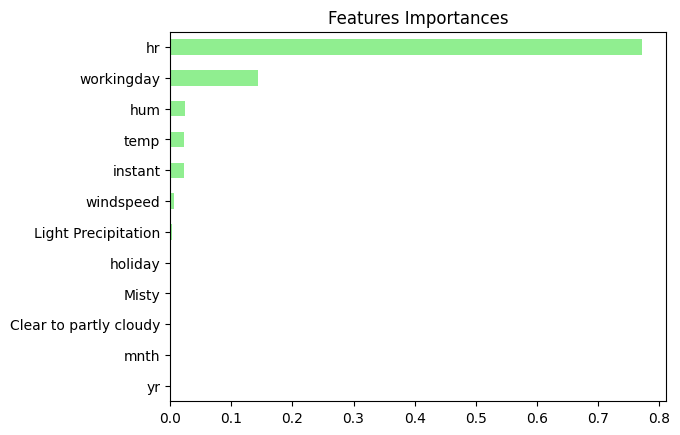

In [ ]:
importances = pd.Series(data=rf.feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')

## Define the AdaBoost classifier
In the following exercises you'll revisit the Indian Liver Patient dataset which was introduced in a previous chapter. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, you'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

As a first step, you'll start by instantiating an AdaBoost classifier.

- Import AdaBoostClassifier from sklearn.ensemble.
- Instantiate a DecisionTreeClassifier with max_depth set to 2.
- Instantiate an AdaBoostClassifier consisting of 180 trees and setting the base_estimator to dt.

In [ ]:
indian.head()

In [ ]:
X = indian.drop(['Liver_disease', 'Unnamed: 0'], axis='columns')
y = indian['Liver_disease']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

## Train the AdaBoost classifier
Now that you've instantiated the AdaBoost classifier ada, it's time train it. You will also predict the probabilities of obtaining the positive class in the test set. This can be done as follows:

Once the classifier ada is trained, call the .predict_proba() method by passing X_test as a parameter and extract these probabilities by slicing all the values in the second column as follows:

ada.predict_proba(X_test)[:,1]

The Indian Liver dataset is processed for you and split into 80% train and 20% test. Feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the instantiated model ada from the previous exercise.

- Fit ada to the training set.
- Evaluate the probabilities of obtaining the positive class in the test set.


In [ ]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


##Evaluate the AdaBoost classifier

Now that you're done training ada and predicting the probabilities of obtaining the positive class in the test set, it's time to evaluate ada's ROC AUC score. Recall that the ROC AUC score of a binary classifier can be determined using the roc_auc_score() function from sklearn.metrics.

The arrays y_test and y_pred_proba that you computed in the previous exercise are available in your workspace.

In [ ]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.62


## Define the GB regressor

You'll now revisit the Bike Sharing Demand dataset that was introduced in the previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a gradient boosting regressor.

As a first step, you'll start by instantiating a gradient boosting regressor which you will train in the next exercise.

-  Import GradientBoostingRegressor from sklearn.ensemble.
- Instantiate a gradient boosting regressor by setting the parameters:
  - max_depth to 4
  - n_estimators to 200


In [ ]:
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [ ]:
X = bike.drop('cnt', axis='columns')
y = bike['cnt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=2)

## Train the GB regressor

You'll now train the gradient boosting regressor gb that you instantiated in the previous exercise and predict test set labels.

The dataset is split into 80% train and 20% test. Feature matrices X_train and X_test, as well as the arrays y_train and y_test are available in your workspace. In addition, we have also loaded the model instance gb that you defined in the previous exercise.

- Fit gb to the training set.
- Predict the test set labels and assign the result to y_pred.


In [ ]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

## Evaluate the GB regressor

Now that the test set predictions are available, you can use them to evaluate the test set Root Mean Squared Error (RMSE) of gb.

y_test and predictions y_pred are available in your workspace.

- Import mean_squared_error from sklearn.metrics as MSE.
- Compute the test set MSE and assign it to mse_test.
- Compute the test set RMSE and assign it to rmse_test.


In [ ]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 49.537


## Regression with SGB

As in the exercises from the previous lesson, you'll be working with the Bike Sharing Demand dataset. In the following set of exercises, you'll solve this bike count regression problem using stochastic gradient boosting.

- Instantiate a Stochastic Gradient Boosting Regressor (SGBR) and set:
  - max_depth to 4 and n_estimators to 200,
  - subsample to 0.9, and
  - max_features to 0.75.


In [ ]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4,
                                 subsample=0.9,
                                 max_features=0.75,
                                 n_estimators=200,
                                 random_state=2)

## Train the SGB regressor

In this exercise, you'll train the SGBR sgbr instantiated in the previous exercise and predict the test set labels.

The bike sharing demand dataset is already loaded processed for you; it is split into 80% train and 20% test. The feature matrices X_train and X_test, the arrays of labels y_train and y_test, and the model instance sgbr that you defined in the previous exercise are available in your workspace.

- Fit sgbr to the training set.
- Predict the test set labels and assign the results to y_pred.



In [ ]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

## Evaluate the SGB regressor

You have prepared the ground to determine the test set RMSE of sgbr which you shall evaluate in this exercise.

y_pred and y_test are available in your workspace.

- Import mean_squared_error as MSE from sklearn.metrics.
- Compute test set MSE and assign the result to mse_test.
- Compute test set RMSE and assign the result to rmse_test.


In [ ]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 47.260


## Tree hyperparameters

In the following exercises you'll revisit the Indian Liver Patient dataset which was introduced in a previous chapter.

Your task is to tune the hyperparameters of a classification tree. Given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

We have instantiated a DecisionTreeClassifier and assigned to dt with sklearn's default hyperparameters. You can inspect the hyperparameters of dt in your console.

In [ ]:
indian.head()

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [ ]:
X = indian.drop(['Liver_disease', 'Unnamed: 0'], axis='columns')
y = indian['Liver_disease']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Set the tree's hyperparameter grid

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree dt and find the optimal classifier in the next exercise.

-  Define a grid of hyperparameters corresponding to a Python dictionary called params_dt with:
  - the key 'max_depth' set to a list of values 2, 3, and 4
  - the key 'min_samples_leaf' set to a list of values 0.12, 0.14, 0.16, 0.18


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt
dt = DecisionTreeClassifier()

# Check default hyperparameter
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Define params_dt
params_dt = {
             'max_depth': [2, 3, 4],
             'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]
            }

## Search for the optimal tree

In this exercise, you'll perform grid search using 5-fold cross validation to find dt's optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the .fit() method:

grid_object.fit(X_train, y_train)

An untuned classification tree dt as well as the dictionary params_dt that you defined in the previous exercise are available in your workspace.

- Import GridSearchCV from sklearn.model_selection.
- Instantiate a GridSearchCV object using 5-fold CV by setting the parameters:
  - estimator to dt, param_grid to params_dt and
  - scoring to 'roc_auc'.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='roc_auc', cv=5, n_jobs=-1)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             scoring='roc_auc')

## Evaluate the optimal tree

In this exercise, you'll evaluate the test set ROC AUC score of grid_dt's optimal model.

In order to do so, you will first determine the probability of obtaining the positive label for each test set observation. You can use the methodpredict_proba() of an sklearn classifier to compute a 2D array containing the probabilities of the negative and positive class-labels respectively along columns.

The dataset is already loaded and processed for you (numerical features are standardized); it is split into 80% train and 20% test. X_test, y_test are available in your workspace. In addition, we have also loaded the trained GridSearchCV object grid_dt that you instantiated in the previous exercise. Note that grid_dt was trained as follows:

grid_dt.fit(X_train, y_train)

- Import roc_auc_score from sklearn.metrics.
- Extract the .best_estimator_ attribute from grid_dt and assign it to best_model.
- Predict the test set probabilities of obtaining the positive class y_pred_proba.
- Compute the test set ROC AUC score test_roc_auc of best_model.


In [ ]:
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print("Test set ROC AUC score: {:.3f}".format(test_roc_auc))

Test set ROC AUC score: 0.681


## Random forests hyperparameters

In the following exercises, you'll be revisiting the Bike Sharing Demand dataset that was introduced in a previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be tuning the hyperparameters of a Random Forests regressor.

We have instantiated a RandomForestRegressor called rf using sklearn's default hyperparameters. You can inspect the hyperparameters of rf in your console.

In [ ]:
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [ ]:
X = bike.drop('cnt', axis='columns')
y = bike['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Set the hyperparameter grid of RF

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune rf's hyperparameters and find the optimal regressor. For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

- Define a grid of hyperparameters corresponding to a Python dictionary called params_rf with:
  - the key 'n_estimators' set to a list of values 100, 350, 500
  - the key 'max_features' set to a list of values 'log2', 'auto', 'sqrt'
  - the key 'min_samples_leaf' set to a list of values 2, 10, 30


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor()

# Get hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params_rf = {
    'n_estimators': [100, 350, 500],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30],
}

## Search for the optimal forest

In this exercise, you'll perform grid search using 3-fold cross validation to find rf's optimal hyperparameters. To evaluate each model in the grid, you'll be using the negative mean squared error metric.

Note that because grid search is an exhaustive search process, it may take a lot time to train the model. Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the .fit() method:

grid_object.fit(X_train, y_train)

The untuned random forests regressor model rf as well as the dictionary params_rf that you defined in the previous exercise are available in your workspace.

- Import GridSearchCV from sklearn.model_selection.
- Instantiate a GridSearchCV object using 3-fold CV by using negative mean squared error as the scoring metric.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, scoring='neg_mean_squared_error', cv=3,
                      verbose=1, n_jobs=-1)

# fit model
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='neg_mean_squared_error', verbose=1)

## Evaluate the optimal forest

In this last exercise of the course, you'll evaluate the test set RMSE of grid_rf's optimal model.

The dataset is already loaded and processed for you and is split into 80% train and 20% test. In your environment are available X_test, y_test and the function mean_squared_error from sklearn.metrics under the alias MSE. In addition, we have also loaded the trained GridSearchCV object grid_rf that you instantiated in the previous exercise. Note that grid_rf was trained as follows:

grid_rf.fit(X_train, y_train)

- Import mean_squared_error as MSE from sklearn.metrics.
- Extract the best estimator from grid_rf and assign it to best_model.
- Predict best_model's test set labels and assign the result to y_pred.
- Compute best_model's test set RMSE.


In [ ]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

Test RMSE of best model: 54.234
